# Neural network based Paddy cultivation Inspection
<b>Revisited Version</b>

This report Contain justification for selection of mathematical functions related to the model.

> 1.Upgrades done to the Model<br>
> 2.System Design<br>
> 3.Network architecture<br> 
> 4.Implementation<br>
> 5.Results of the Model <br>
> 6.Inference Model <br>

### 1.Upgrades done to the Model

Completely New set of Training and Testing Date were collected from the field (During the period when implementing the model paddy cultivations were not in a situation to collect data). They contain six different classes of paddy images which is shown in the System Design. New Training and Testing Set contains more than 4,000 images that were collected from different fields.

Due to an Error in the Code base, when generating Test set the images were taken from Train set directory. Therefore, after training the Model, It was tested using same training set, this caused giving accuracy as 100%. This has been fixed in the Revisited version of the Model.

To minimize the loss of image details the size of images that were used to train and test the Model was increased from 50px to 64px. (Ideal size is 500px or More, Limited  to 64px due to Available performance in Training computer)

 ### 2. System Design

This model can identify 6 differentiations in paddy cultivations.

<h4><center>Healthy Paddy plants 
<img src="images\DataSet\Healthy (1).jpg" alt="" title="Healthy"  style="width:248px;height:128px;" /></center></h4>
<h4><center>Plants with nutrient deficiency
<img src="images\DataSet\LowFertile (1).jpg" alt="Alt text that describes the graphic" title="Title text" style="width:248px;height:128px;" /></center></h4>
<h4><center>Plants with Weed type 1 
<img src="images\DataSet\WeedType1 (1).jpg" alt="Alt text that describes the graphic" title="Title text" style="width:248px;height:128px;"/></center></h4>
<h4><center> Plants with Weed type 2
<img src="images\DataSet\WeedType2 (1).jpg" alt="Alt text that describes the graphic" title="Title text" style="width:248px;height:128px;"/></center></h4>
<h4><center> Plants with Weed type 3
<img src="images\DataSet\WeedType3 (55).jpg" alt="Alt text that describes the graphic" title="Title text" style="width:248px;height:128px;"/></center></h4>
<h4><center> Plants with Weed type 4
<img src="images\DataSet\WeedType4 (1).jpg" alt="Alt text that describes the graphic" title="Title text" style="width:248px;height:128px;"/></center></h4>

User can input a image/ images which contains paddy, model will classify the image/ images with percentages of above classifications. 

 ### 3. Network architecture

Five-layer neural network, input layer 64x64x3= 12 288, output 6 (6 types which were mentioned  in the System Design)
Output labels uses one-hot encoding





| Layer                   |  Dimensions                |
|-------------------------|----------------------------|
| input layer-X           |  [TrainSet size, IMG_SIZExIMG_SIZEx3]           | 
| 1 layer                 |  W1[IMG_SIZExIMG_SIZEx3, 200] + b1[200]<br>Y1[TrainSet size, 200]            |
| 2 layer                 |  W2[200, 100] + b2[100]<br>Y2[TrainSet size, 200]            |
| 3 layer                 |  W3[100, 60]  + b3[60]<br> Y3[TrainSet size, 200]            
| 4 layer                 |  W4[60, 30]   + b4[30]<br>Y4[TrainSet size, 30]             |
| 5 layer                 |  W5[30, 6]   + b5[6]     |
|  One-hot encoded label  |  Y5[TrainSet size, 6]             |

Layer implementation can be found [here](#layerimp)

#### model interpretation

<img src="images\Report\Equations\sm.png" alt="Alt text that describes the graphic" title="Title text" />


#### Why 5 -layer Neural Network

 This application is based on visual classification of images. The Differences between classes are due to small changes of features in images. In neural networks when we have more hidden layers the model can inspect more features that are available in the images when classifying. To get the maximum usage out of this the image sizes should be reasonable, and they should not have loosened their features upon resizing or manipulation. Therefore the Selection of 5 layers for this model was decided considering, taking the maximum usage of available hardware resources for better inspection  of features in the images.

This Model can be easily expandable for more classes and more Layers in future applications.

> ### Label representation
> Here are examples for each number, how each label is represented. These are the original pictures,
<img src="images\Report\paddy.png" alt="Alt text that describes the graphic" title="Title text" />

> Generation of data set according to the above Lable representaion can be found [here](#data)

> ### One Hot Matrix (One hot encoding)
> In deep learning we use y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then we have the following y vector which we will need to convert as follows:
<img src="images\Report\onehot.png" alt="Alt text that describes the graphic" title="Title text" />
In this model One Hot matrix technique is used for the encodeing of data.


### Selection of Error calculation function (Cost function) 

Cost functions calculate the difference between actual value (a) and the expected value (E). 
#### Quadratic cost
   Also known as mean squared error (Error sum of squares), maximum likelihood, and sum squared error, this is defined as:


<img src="images\Report\Equations\mst.png" alt="Alt text that describes the graphic" title="Title text" />
   The gradient of this cost function with respect to the output of a neural network and some sample r is:


<img src="images\Report\Equations\CaMst.png" alt="Alt text that describes the graphic" title="Title text"/>

   TensorFlow implementation- `tf.losses.mean_squared_error`<br>
 
 <center><b>Accuracy with Quadratic cost</b><br>
Train Accuracy: 0.9433127<br>
Test Accuracy: 0.802627<br>
F1 Score: 0.8673017086<br>
Time elapsed:5576.826694250107 Seconds<img src="images\report\qc.png" alt="Alt text that describes the graphic" title="Title text" style="width:350px;height:250px;"/></center>


#### Cross-entropy cost
   Also known as Bernoulli negative log-likelihood and Binary Cross-Entropy


<img src="images\Report\Equations\cce1.png" alt="Alt text that describes the graphic" title="Title text" />
   The gradient of this cost function with respect to the output of a neural network and some sample r is:


<img src="images\Report\Equations\cce.png" alt="Alt text that describes the graphic" title="Title text" />
   TensorFlow implementation- `tf.nn.sigmoid_cross_entropy_with_logits`<br>


<center><b>Accuracy with Cross-entropy cost</b><br>
    Train Accuracy: 0.9854759<br>
Test Accuracy: 0.81040895<br>
F1 Score: 0.8946081757097<br>    
Time elapsed:6233.307367324829 Seconds<img src="images\report\cce.png" alt="Alt text that describes the graphic" title="Title text" style="width:350px;height:250px;"/></center>



#### Exponentional cost
   This cost function requires choosing some parameter τ that we think will give us the behavior we need. We have to try different numbers until we get a better result. When training a model, it is often recommended to lower the learning rate as the training progresses. This function applies an exponential decay function to a provided initial learning rate.


<img src="images\Report\Equations\Exp.png" alt="Alt text that describes the graphic" title="Title text" />

This function can be used to calculate optimum learning rate for the model.

   TensorFlow implementation-`tf.train.exponential_decay`<br>
 <center> <b> This feature is expected to implement in future</b></center>


<h4> Selection of Cost function was done using Single number evaluation Metric, for this F1 Score is Used. This is a kind of Averaging method known as Harmonic Mean</h4>


<img src="images\Report\Equations\f1.png" alt="Alt text that describes the graphic" title="Title text" />

<center><h4>Since the best F1 Score of 0.8946081757097 is recorded from Cross-entropy cost, it was selected as Cost function</h4></center>


Cost function implementation can be found [here](#cost)


### Selection of Activation function
##### Linear Function
 <img src="images\report\linear.png" alt="Alt text that describes the graphic" title="Title text" style="width:250px;height:250px;"/>

 <img src="images\Report\Equations\lin.png" alt="Alt text that describes the graphic" title="Title text"/>
##### Sigmoid
<img src="images\report\sigmoid.png" alt="Alt text that describes the graphic" title="Title text" style="width:250px;height:250px;"/>


 <img src="images\Report\Equations\sigmoid.png" alt="Alt text that describes the graphic" title="Title text"/>
##### Tanh
 <img src="images\report\tanh1.png" alt="Alt text that describes the graphic" title="Title text" style="width:250px;height:250px;"/>

 <img src="images\Report\Equations\tanh.png" alt="Alt text that describes the graphic" title="Title text" />
##### ReLU
 <img src="images\report\relu.png" alt="Alt text that describes the graphic" title="Title text" style="width:250px;height:250px;"/>

 <img src="images\Report\Equations\relu.png" alt="Alt text that describes the graphic" title="Title text"/>
##### Leaky ReLU
 <img src="images\report\leaky-relu.png" alt="Alt text that describes the graphic" title="Title text" style="width:250px;height:250px;"/>


 <img src="images\Report\Equations\leakyR.png" alt="Alt text that describes the graphic" title="Title text"/>
##### Softmax

 Softmax function is a more generalized version of Sigmoid function. Since Sigmoid gives better results for classifiers and can only be used for binary classifiers Softmax function was created. This is a very popular Activation function among data scientists. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs. This essentially gives the probability of the input being in a class. It can be defined as :

 <img src="images\Report\Equations\softmax.png" alt="Alt text that describes the graphic" title="Title text" />

> #### Selected Activation functions and Why

> Activation functions were selected based on logic and heuristics about them since there are no any rule of thumb to select them.

> - Sigmoid functions and their combinations generally work better in the case of classifiers but statndered Sigmoid function is used for binary classifiers. Softmax is more generalized type of Sigmoid function where we can use them in multi class classifiers
> - Sigmoids and tanh functions are avoided due to the vanishing gradient problem
> - ReLU function is a general activation function and gives best results.
> - But ReLU function work their best only in hidden layers.

>  This project initially started with ReLU function and tested for others. Considering the F1 score, activation function combinations were selected as Follows (All combinations were tested under Cross-entropy cost):

| Layer                   |  Activation Function                 |
|-------------------------|----------------------------|
| 1 layer                 |  ReLU |
| 2 layer                 |  ReLU     |
| 3 layer                 | ReLU      |
| 4 layer                 |  ReLU    |
| 5 layer                 |  SoftMax     |

<center><b>Accuracy with above Combination </b><br>
    Train Accuracy: 0.9854759<br>
Test Accuracy: 0.81908303<br>
        F1 Score: 0.8946081757097 <br></center>

 Previous Activation function Combinations

| Layer                   |  Activation Function                 |
|-------------------------|----------------------------|
| 1 layer                 |  ReLU |
| 2 layer                 |  Linear     |
| 3 layer                 | ReLU      |
| 4 layer                 | Linear  |
| 5 layer                 |  SoftMax     |

<center><b>Accuracy with above Combination </b><br>
    Train Accuracy: 0.9349215<br>
Test Accuracy: 0.78050196<br>
        F1 Score: 0.8507614361 <br></center>


| Layer                   |  Activation Function                 |
|-------------------------|----------------------------|
| 1 layer                 |  Linear |
| 2 layer                 |  Linear     |
| 3 layer                 | Linear      |
| 4 layer                 | Linear  |
| 5 layer                 |  SoftMax     |

<center><b>Accuracy with above Combination </b><br>
    Train Accuracy: 0.81223983<br>
Test Accuracy: 0.71080005<br>
        F1 Score: 0.758141818<br></center>




### 4. Implementation

> #### Available tools to implement Neural networks
> -  **MathLab**
-  **Python**
>  -  Using numpy (Math library for Python)
>  -  Using TensorFlow (Developed by Google)

> From above selection Python was selected due to the availability of Python. This model should be able to run on SOC devices (System on Chip devices). Implementing the model using python helps to make changes easily to run on different platforms.

> This Model was initially developed with only using numpy and the source code is available commented on this Report.

> The Main reason to move on to the TensorFlow is it has Cuda implementation where the model can be run on the GPU much faster than the CPU. TensorFlow has lot of built in features that supports for Neural networks

### 5.Results of the Model

> Results of the Model for Custom images can be found from [here](#results)

### 6.Inference Model
> Inference is used for Save the Parameters. By Saving trained parameters we do not need to run the program each time when we want to use the model.
> Using Inference Model an Android app was created.
> Inference of the Model can be found from [here](#inference)




In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot# predict
import os

%matplotlib inline

IMG_SIZE=64

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Generate data sets
<a id="data"></a>

In [ ]:
import numpy as np
import h5py
import scipy
import skimage
from PIL import Image
from scipy import ndimage
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from skimage import transform

TRAIN_DIR='images/DataSet'
TEST_DIR='images/TestSet'
IMG_SIZE=64

def label_img(img):
    word_label=img.split(' ')
    if word_label[0]=='Healthy':
        return 0
    elif word_label[0]=='LowFertile':
        return 1
    elif word_label[0]=='WeedType1':
        return 2
    elif word_label[0]=='WeedType2':
        return 3
    elif word_label[0]=='WeedType3':
        return 4
    elif word_label[0]=='WeedType4':
        return 5
    

def generateTrainSet():
    hf = h5py.File('images/temp/train_plants.h5', 'w')
    d1 = []
    d2 = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
            label=label_img(img)
            fname = os.path.join(TRAIN_DIR,img)
            #print (fname)
            image = np.array(plt.imread(fname))
            my_image =skimage.transform.resize(image, (IMG_SIZE,IMG_SIZE))#.reshape((1, IMG_SIZE*IMG_SIZE*3)).T
            d1.append(my_image)
            d2.append(label)


            #print (d1.shape, d2.shape)
    d1=np.array(d1)
    d2=np.array(d2)
    hf.create_dataset('train_set_x', data=d1)
    hf.create_dataset('train_set_y', data=d2)
    hf.close()
    
def generateTestSet():
    hf = h5py.File('images/temp/test_plants.h5', 'w')
    d1 = []
    d2 = []
    for img in tqdm(os.listdir(TEST_DIR)):
            label=label_img(img)
            fname = os.path.join(TEST_DIR,img)
            image = np.array(plt.imread(fname))
            my_image = skimage.transform.resize(image,(IMG_SIZE,IMG_SIZE))#.reshape((1, IMG_SIZE*IMG_SIZE*3)).T
            d1.append(my_image)
            d2.append(label)


            #print (d1.shape, d2.shape)
    d1=np.array(d1)
    d2=np.array(d2)
    classes=np.array([0,1,2,3,4,5])
    hf.create_dataset('test_set_x', data=d1)
    hf.create_dataset('test_set_y', data=d2)
    hf.create_dataset('list_classes', data=classes)
    hf.close()

In [ ]:
generateTrainSet()
generateTestSet()

In [2]:
def one_hot_matrix(labels, C):

    C = tf.constant(C, name="C")
    # Use tf.one_hot
    one_hot_matrix = tf.one_hot(labels, depth=C, axis=0)
    # Create the session
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    # Close the session
    sess.close()
    
    return one_hot

In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_plants.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set labels

    test_dataset = h5py.File('datasets/test_plants.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [5]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [6]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 0


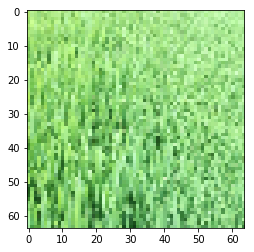

In [7]:
# Example picture of data set
index = 400
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [8]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)


# Cost Function
<a id="cost"></a>

In [9]:
def compute_cost(Z3, Y): #Implemented with different cost functions
    """
    Computes the cost
    2 types cost functions have been implemented here for training
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    #cost =tf.reduce_mean(tf.losses.mean_squared_error(labels=labels,predictions=logits))
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

# Model
<a id="layerimp"></a>

Cost after epoch 0: 1.809457
Cost after epoch 100: 1.678947
Cost after epoch 200: 1.662220
Cost after epoch 300: 1.662667
Cost after epoch 400: 1.663065
Cost after epoch 500: 1.658843
Cost after epoch 600: 1.658609
Cost after epoch 700: 1.656716
Cost after epoch 800: 1.656338
Cost after epoch 900: 1.657913
Cost after epoch 1000: 1.654736
Cost after epoch 1100: 1.658111
Cost after epoch 1200: 1.660155
Cost after epoch 1300: 1.657104
Cost after epoch 1400: 1.656078


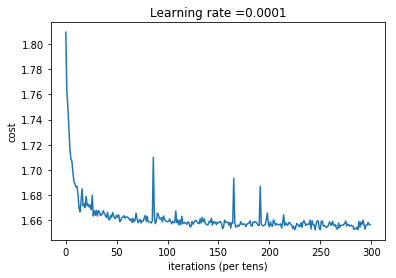

Parameters have been trained!
Train Accuracy: 0.9854759
Test Accuracy: 0.81908303
5866.036787986755


In [10]:
IMG_SIZE=64
learning_rate = 0.0001
num_epochs = 1500
print_cost = True
minibatch_size = 32
import time

start=time.time()


ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
tf.set_random_seed(1)                             # to keep consistent results
seed = 3                                          # to keep consistent results
(n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
n_y = Y_train.shape[0]                            # n_y : output size
costs = []                                        # To keep track of the cost

# Create Placeholders of shape (n_x, n_y)


X = tf.placeholder(tf.float32,[n_x,None],name="X")
Y = tf.placeholder(tf.float32,[n_y,None],name="Y")



# Initialize parameters


    
#W1 = tf.get_variable("W1", [25,IMG_SIZE*IMG_SIZE*3], initializer = tf.contrib.layers.xavier_initializer())
#b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
#W2 =  tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer())
#b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
#W3 =  tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer())
#b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())

L1 = 200
L2 = 100
L3 = 60
L4 = 30
L5 = 6


W1 = tf.Variable(tf.truncated_normal([L1,IMG_SIZE*IMG_SIZE*3], stddev=0.1))
b1 = tf.Variable(tf.zeros([L1,1]))

W2 = tf.Variable(tf.truncated_normal([L2,L1], stddev=0.1))
b2 = tf.Variable(tf.zeros([L2,1]))

W3 = tf.Variable(tf.truncated_normal([L3,L2], stddev=0.1))
b3 = tf.Variable(tf.zeros([L3,1]))

W4 = tf.Variable(tf.truncated_normal([L4,L3], stddev=0.1))
b4 = tf.Variable(tf.zeros([L4,1]))

W5 = tf.Variable(tf.truncated_normal([L5,L4], stddev=0.1))
b5 = tf.Variable(tf.zeros([L5,1]))

parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              "W4": W4,
              "b4": b4,
              "W5": W5,
              "b5": b5
                      }








phconst = tf.placeholder(tf.float32)

                                                   # Numpy Equivalents:
#Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
#A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
#Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
#A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
#Z3 = tf.add(tf.matmul(W3, A2), b3,name='output')                     # Z3 = np.dot(W3,Z2) + b3


A1 = tf.nn.leaky_relu(tf.matmul(W1,X) + b1)
#A1 = tf.nn.dropout(A1, phconst)

A2 = tf.nn.relu(tf.matmul(W2,A1) + b2)
#A2 = tf.nn.dropout(A2, phconst)

A3 = tf.nn.leaky_relu(tf.matmul(W3,A2) + b3)
#A3 = tf.nn.dropout(A3, phconst)

A4 = tf.nn.relu(tf.matmul(W4,A3) + b4)
#A4 = tf.nn.dropout(A4, phconst)

Alogits = tf.matmul(W5,A4) + b5
#Z5 = tf.nn.softmax(Alogits,name='output')


# Cost function: Add cost function to tensorflow graph

cost = compute_cost(Alogits, Y)




# Backpropagation: Define the tensorflow optimizer. Using AdamOptimizer.

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)



# Initialize all the variables
init = tf.global_variables_initializer()

# Start the session to compute the tensorflow graph
with tf.Session() as sess:

    # Run the initialization
    sess.run(init)



    # Do the training loop
    for epoch in range(num_epochs):

        epoch_cost = 0.                       # Defines a cost related to an epoch
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # IThe line that runs the graph on a minibatch.
            # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})


            epoch_cost += minibatch_cost / num_minibatches

        # Print the cost every epoch
        if print_cost == True and epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)


    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # lets save the parameters in a variable
    #parameters = sess.run(parameters)

    print ("Parameters have been trained!")

    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Alogits), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
    

    parameters = sess.run(parameters)
    saver = tf.train.Saver()
#sess = tf.InteractiveSession()

#init = tf.global_variables_initializer()
  

    g = tf.get_default_graph()

# every operations in our graph
    [op.name for op in g.get_operations()]
    
    #saver = tf.train.Saver()
    model_directory='model_files/'
    if not os.path.exists(model_directory):
            os.makedirs(model_directory)
    #saving the graph
    tf.train.write_graph(sess.graph_def, model_directory, 'savegraph.pbtxt') 
    
    saver.save(sess, 'model_files/model.ckpt')

np.save('parameters.npy',parameters)
print (time.time()-start)


# Inference Stage
<a id="inference"></a>

In [17]:
#saver = tf.train.Saver()
model_directory='model_files/'
if not os.path.exists(model_directory):
        os.makedirs(model_directory)
#saving the graph
tf.train.write_graph(sess.graph_def, model_directory, 'savegraph.pbtxt')    

'model_files/savegraph.pbtxt'

In [49]:

# Freeze the graph
MODEL_NAME = 'paddy'
input_graph_path = 'model_files/savegraph.pbtxt'
checkpoint_path = 'model_files/model.ckpt'
input_saver_def_path = ""
input_binary = False
output_node_names = "output"
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'model_files/frozen_model_'+MODEL_NAME+'.pb'
output_optimized_graph_name = 'model_files/optimized_inference_model_'+MODEL_NAME+'.pb'
clear_devices = True

In [50]:
freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                          input_binary, checkpoint_path, output_node_names,
                          restore_op_name, filename_tensor_name,
                          output_frozen_graph_name, clear_devices, "")

INFO:tensorflow:Restoring parameters from model_files/model.ckpt
INFO:tensorflow:Froze 6 variables.
Converted 6 variables to const ops.


In [51]:
output_graph_def = optimize_for_inference_lib.optimize_for_inference(
        sess.graph_def,
        ["X"], # an array of the input node(s)
        ["output"], # an array of output nodes
        tf.float32.as_datatype_enum)

In [25]:
#output_graph_def

In [53]:
with tf.gfile.GFile(output_optimized_graph_name, "wb") as f:
            f.write(output_graph_def.SerializeToString())

In [27]:
#g = tf.GraphDef()
##checking frozen graph
#g.ParseFromString(open(output_optimized_graph_name, 'rb').read())
#g

In [28]:
#g1 = tf.GraphDef()
##checking frozen graph
#g1.ParseFromString(open("./model_files/frozen_model_paddy.pb", 'rb').read())
#g1

# Testing for Images
<a id="results"></a>

In [19]:
def forward_propagation(X, parameters):


                                                   # Numpy Equivalents:
#Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
#A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
#Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
#A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
#Z3 = tf.add(tf.matmul(W3, A2), b3,name='output')                     # Z3 = np.dot(W3,Z2) + b3



    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
                                                                                 # Numpy Equivalents:
    #Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1
    #A1 = tf.nn.relu(Z1)                                                         # A1 = relu(Z1)
    #Z2 = tf.add(tf.matmul(W2,A1),b2)                                            # Z2 = np.dot(W2, a1) + b2
    #A2 = tf.nn.relu(Z2)                                                          # A2 = relu(Z2)
    #Z3 = tf.add(tf.matmul(W3,A2),b3)                                              # Z3 = np.dot(W3,Z2) + b3
    
    A1 = tf.nn.relu(tf.matmul(W1,X) + b1)
    #A1 = tf.nn.dropout(A1, phconst)

    A2 = tf.nn.relu(tf.matmul(W2,A1) + b2)
    #A2 = tf.nn.dropout(A2, phconst)

    A3 = tf.nn.relu(tf.matmul(W3,A2) + b3)
    #A3 = tf.nn.dropout(A3, phconst)

    A4 = tf.nn.relu(tf.matmul(W4,A3) + b4)
    #A4 = tf.nn.dropout(A4, phconst)

    Alogits = tf.matmul(W5,A4) + b5
    Z5 = tf.nn.softmax(Alogits,name='output')

    
    return Alogits
    

In [20]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    W4 = tf.convert_to_tensor(parameters["W4"])
    b4 = tf.convert_to_tensor(parameters["b4"])
    W5 = tf.convert_to_tensor(parameters["W5"])
    b5 = tf.convert_to_tensor(parameters["b5"])

    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              "W4": W4,
              "b4": b4,
              "W5": W5,
              "b5": b5
                      }
    
    x = tf.placeholder("float", [12288, 1])
    
    z5 = forward_propagation(x, params)
    p = tf.argmax(z5)
    
    with tf.Session() as sess:
        prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [23]:
def picType(n):
    if n==0:
        return 'Healthy'
    elif n==1:
        return 'Low fertile soil'
    elif n==2:
        return 'Weed type 1'
    elif n==3:
        return 'Weed type 2'
    elif n==4:
        return 'Weed type 3'
    elif n==5:
        return 'Weed type 4'


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


2.0528512001037598


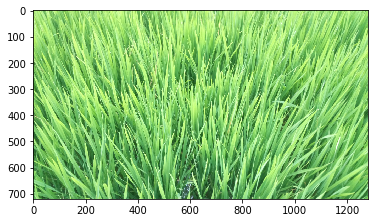

[0]
Algorithm predicts image is Healthy   for Image Healthy (1).jpg
2.1957433223724365


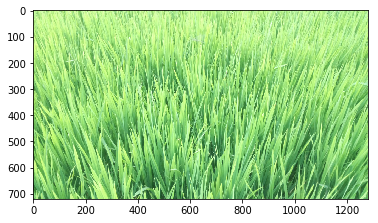

[0]
Algorithm predicts image is Healthy   for Image Healthy (91).jpg
2.169037103652954


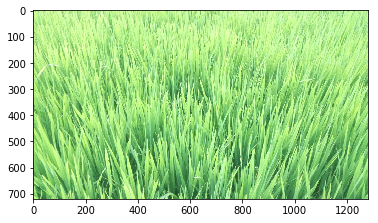

[0]
Algorithm predicts image is Healthy   for Image Healthy (99).jpg
2.293268918991089


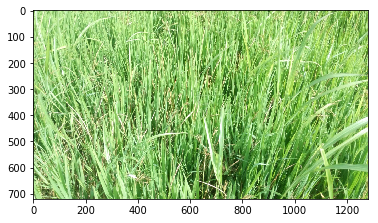

[1]
Algorithm predicts image is Low fertile soil   for Image LowFertile (118).jpg
2.410043239593506


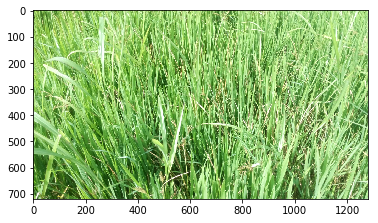

[1]
Algorithm predicts image is Low fertile soil   for Image LowFertile (123).jpg
2.414912700653076


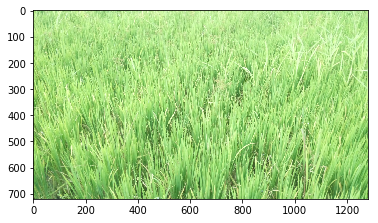

[1]
Algorithm predicts image is Low fertile soil   for Image LowFertile (675).jpg
2.4762115478515625


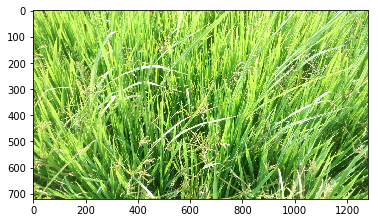

[2]
Algorithm predicts image is Weed type 1   for Image WeedType1 (111).jpg
2.693964958190918


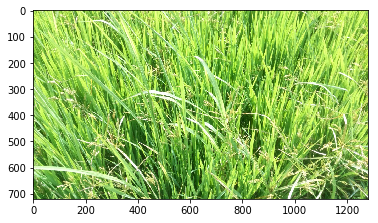

[2]
Algorithm predicts image is Weed type 1   for Image WeedType1 (136).jpg
2.6702353954315186


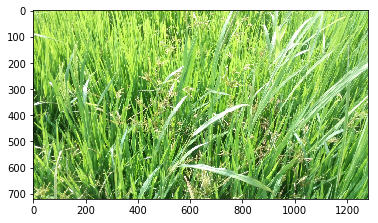

[2]
Algorithm predicts image is Weed type 1   for Image WeedType1 (213).jpg
2.7993574142456055


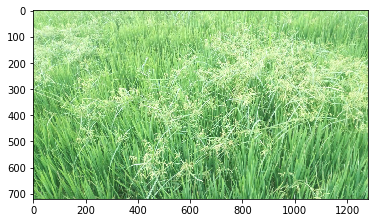

[3]
Algorithm predicts image is Weed type 2   for Image WeedType2 (228).jpg
2.9096872806549072


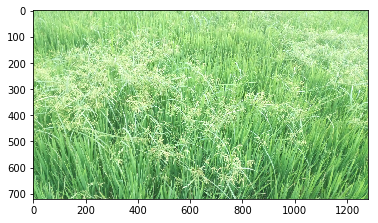

[3]
Algorithm predicts image is Weed type 2   for Image WeedType2 (233).jpg
3.095151662826538


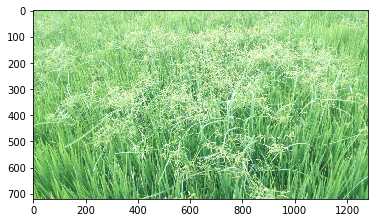

[3]
Algorithm predicts image is Weed type 2   for Image WeedType2 (304).jpg
3.01702618598938


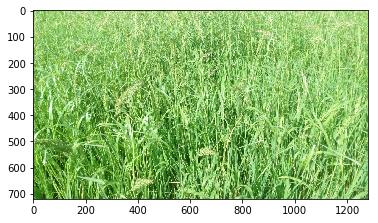

[4]
Algorithm predicts image is Weed type 3   for Image WeedType3 (120).jpg
3.498566150665283


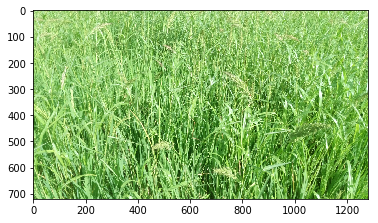

[4]
Algorithm predicts image is Weed type 3   for Image WeedType3 (127).jpg
3.426443099975586


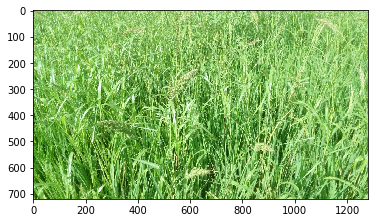

[4]
Algorithm predicts image is Weed type 3   for Image WeedType3 (144).jpg
3.37260103225708


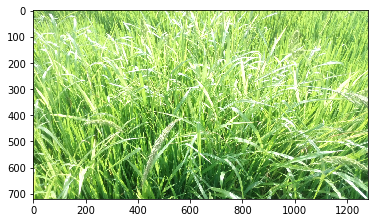

[4]
Algorithm predicts image is Weed type 3   for Image WeedType3 (863).jpg
3.5212819576263428


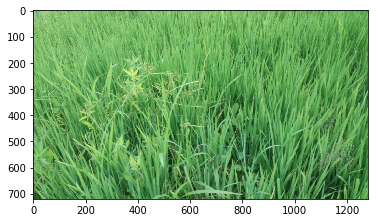

[5]
Algorithm predicts image is Weed type 4   for Image WeedType4 (247).jpg
3.753375291824341


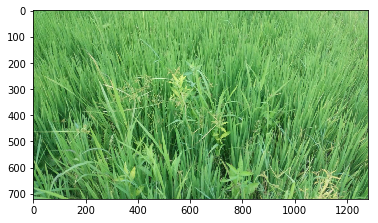

[5]
Algorithm predicts image is Weed type 4   for Image WeedType4 (262).jpg
3.7938544750213623


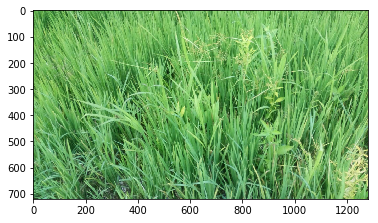

[5]
Algorithm predicts image is Weed type 4   for Image WeedType4 (352).jpg


In [24]:
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np
import os
from tqdm import tqdm
import time
IMG_SIZE=64
DEMO_DIR = "images/Demo"

loaded_data=np.load('parameters.npy')
parameters = {"W1": loaded_data.item().get('W1'),
              "b1": loaded_data.item().get('b1'),
              "W2": loaded_data.item().get('W2'),
              "b2": loaded_data.item().get('b2'),
              "W3": loaded_data.item().get('W3'),
              "b3": loaded_data.item().get('b3'),
              "W4": loaded_data.item().get('W4'),
              "b4": loaded_data.item().get('b4'),
              "W5": loaded_data.item().get('W5'),
              "b5": loaded_data.item().get('b5')}





for img in os.listdir(DEMO_DIR):
    fname = os.path.join(DEMO_DIR,img)
    image = np.array(ndimage.imread(fname, flatten=False))
    startTime=time.time()
    my_image= scipy.misc.imresize(image, size=(IMG_SIZE,IMG_SIZE)).reshape((1, IMG_SIZE*IMG_SIZE*3)).T
    my_image_prediction = predict(my_image, parameters)
    print (time.time()-startTime)
    plt.imshow(image)
    plt.pause(0.0001)
    print(my_image_prediction)
    print("Algorithm predicts image is " + picType(np.squeeze(my_image_prediction))+"   for Image "+str(img))